# Data Cleaning with Pandas

In [66]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

## Catch-Up from Yesterday

## Reshaping a DataFrame

### `.pivot()` and `.pivot_table()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [1]:
import pandas as pd
uci = pd.read_csv('heart.csv')

In [2]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
uci.pivot(values = 'sex', columns = 'target').head()

target,0,1
0,NaN,1.0
1,NaN,1.0
2,NaN,0.0
3,NaN,1.0
4,NaN,0.0


In [4]:
uci.pivot_table(values = 'chol', index = 'sex', columns = 'target', aggfunc = 'mean')

target,0,1
sex,,
0,274.958333,256.750000
1,246.061404,230.989247


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [5]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [6]:
toy1.join(toy2.set_index('age'),
          on = 'age',
          lsuffix = '_1',
          rsuffix = '_2').head()

,age,HP_1,HP_2
0,63,142,100
1,33,47,200


### `.merge()`

In [7]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [8]:
states = pd.read_csv('states.csv', index_col = 0)
states

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [9]:
ds_chars.merge(states,
               left_on='home_state',
               right_on = 'state',
               how = 'inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


In [10]:
ds_chars.merge(states.rename(columns={'state':'home_state'}),
               on='home_state',
               how = 'inner')

,name,HP,home_state,nickname,capital
0,greg,200,WA,evergreen,Olympia
1,miles,200,WA,evergreen,Olympia
2,alan,170,TX,alamo,Austin
3,rachel,200,TX,alamo,Austin
4,alison,300,DC,district,Washington


### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [11]:
pd.concat([ds_chars, states], axis=1)

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,TX,alamo,Austin
2,alan,170,TX,DC,district,Washington
3,alison,300,DC,OH,buckeye,Columbus
4,rachel,200,TX,OR,beaver,Salem


### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [12]:
ds_chars.head()

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [13]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

,name,variable,value
0,greg,HP,200
1,miles,HP,200
2,alan,HP,170
3,alison,HP,300
4,rachel,HP,200
5,greg,home_state,WA
6,miles,home_state,WA
7,alan,home_state,TX
8,alison,home_state,DC
9,rachel,home_state,TX


## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here


## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

Now, we'll need to download the two data files that we need. I will send those zipped files to you in Slack.


Note that there are spaces in the file name. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the file that you want to unzip.

In [23]:
sales_df = pd.read_csv('data/Real Property Sales.zip')

### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [15]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


In [22]:
sales_df.isna().sum()

Major           0
Minor           0
DocumentDate    0
SalePrice       0
dtype: int64

### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [24]:
sales_df = sales_df[['ExciseTaxNbr','Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [26]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 5 columns):
ExciseTaxNbr    int64
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(2), object(3)
memory usage: 78.2+ MB


In [18]:
sales_df.head()

,Major,Minor,DocumentDate,SalePrice
0,138860,110,08/21/2014,245000
1,664885,40,07/09/1991,0
2,423943,50,10/11/2014,0
3,403700,715,01/04/2013,0
4,951120,900,04/20/1989,85000


In [27]:
bldg_df = pd.read_csv('data/Residential Building.zip')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Another warning! Which column has index 11?

In [28]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [29]:
bldg_df.head().T

,0,1,2,3,4
Major,4100,4100,4100,4100,4100
Minor,14,14,165,175,406
BldgNbr,1,2,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,3251 S 148TH ST 98168,3251 S 148TH ST 98168,4001 S 148TH ST 98168,4039 S 148TH ST 98168,15051 MILITARY RD S 98188
BuildingNumber,3251,3251,4001,4039,15051
Fraction,,,,,
DirectionPrefix,S,S,S,S,
StreetName,148TH,148TH,148TH,148TH,MILITARY
StreetType,ST,ST,ST,ST,RD


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [30]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving','YrBuilt', 'ZipCode']]

In [31]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514381 entries, 0 to 514380
Data columns (total 5 columns):
Major            514381 non-null int64
Minor            514381 non-null int64
SqFtTotLiving    514381 non-null int64
YrBuilt          514381 non-null int64
ZipCode          468541 non-null object
dtypes: int64(4), object(1)
memory usage: 19.6+ MB


In [32]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

In [33]:
sales_data.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
0,2687551,138860,110,08/21/2014,245000,1490,1989,98002
1,1066933,138860,110,06/12/1989,109300,1490,1989,98002
2,2102034,138860,110,01/16/2005,14684,1490,1989,98002
3,2131568,138860,110,06/08/2005,0,1490,1989,98002
4,2704079,423943,50,10/11/2014,0,960,1969,98092


In [34]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'])

ValueError: Unable to parse string "      " at position 949114

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [35]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [36]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [37]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 5 columns):
ExciseTaxNbr    int64
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(2), object(2)
memory usage: 78.2+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [38]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [39]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049216 entries, 0 to 2049215
Data columns (total 5 columns):
ExciseTaxNbr    int64
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(2), object(1)
memory usage: 78.2+ MB


In [42]:
sales_df.isna().sum()

ExciseTaxNbr    0
Major           2
Minor           2
DocumentDate    0
SalePrice       0
dtype: int64

Now, let's try our join again.

In [92]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [93]:
sales_data.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
0,2687551,138860.0,110.0,08/21/2014,245000,1490,1989,98002
1,1066933,138860.0,110.0,06/12/1989,109300,1490,1989,98002
2,2102034,138860.0,110.0,01/16/2005,14684,1490,1989,98002
3,2131568,138860.0,110.0,06/08/2005,0,1490,1989,98002
4,2704079,423943.0,50.0,10/11/2014,0,960,1969,98092


In [45]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464608 entries, 0 to 1464607
Data columns (total 8 columns):
ExciseTaxNbr     1464608 non-null int64
Major            1464608 non-null float64
Minor            1464608 non-null float64
DocumentDate     1464608 non-null object
SalePrice        1464608 non-null int64
SqFtTotLiving    1464608 non-null int64
YrBuilt          1464608 non-null int64
ZipCode          1341848 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 100.6+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [46]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
100,2546588,858140.0,376.0,05/22/2012,0,900,2018,NaN
101,2907978,858140.0,376.0,11/28/2017,0,900,2018,NaN
158,2220242,334330.0,1343.0,05/30/2006,0,4600,2007,NaN
159,2220252,334330.0,1343.0,05/30/2006,0,4600,2007,NaN
160,2019514,334330.0,1343.0,11/26/2001,0,4600,2007,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

*Note:* we can use [Boolean Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) to select all the rows where there are no missing zip codes

In [94]:
sales_data2 = sales_data[~sales_data['ZipCode'].isna()].copy()
sales_data2.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
0,2687551,138860.0,110.0,08/21/2014,245000,1490,1989,98002
1,1066933,138860.0,110.0,06/12/1989,109300,1490,1989,98002
2,2102034,138860.0,110.0,01/16/2005,14684,1490,1989,98002
3,2131568,138860.0,110.0,06/08/2005,0,1490,1989,98002
4,2704079,423943.0,50.0,10/11/2014,0,960,1969,98092


### An alternative method to drop missing is `.dropna()`

In [48]:
sales_data3=sales_data.dropna()
sales_data3.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
0,2687551,138860.0,110.0,08/21/2014,245000,1490,1989,98002
1,1066933,138860.0,110.0,06/12/1989,109300,1490,1989,98002
2,2102034,138860.0,110.0,01/16/2005,14684,1490,1989,98002
3,2131568,138860.0,110.0,06/08/2005,0,1490,1989,98002
4,2704079,423943.0,50.0,10/11/2014,0,960,1969,98092


# Your turn: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

In [50]:
sales_data2.SalePrice.value_counts().head(20)

0         460852
250000      4773
300000      4649
350000      4466
200000      4115
225000      4035
325000      3977
400000      3850
150000      3823
275000      3805
450000      3542
175000      3536
220000      3420
230000      3416
180000      3392
210000      3385
260000      3382
165000      3379
375000      3338
160000      3319
Name: SalePrice, dtype: int64

In [95]:
sales_data2.SalePrice = sales_data2.SalePrice.replace(0,np.nan)

In [60]:
sales_data2.SalePrice.value_counts().head(20)

250000.0    4773
300000.0    4649
350000.0    4466
200000.0    4115
225000.0    4035
325000.0    3977
400000.0    3850
150000.0    3823
275000.0    3805
450000.0    3542
175000.0    3536
220000.0    3420
230000.0    3416
180000.0    3392
210000.0    3385
260000.0    3382
165000.0    3379
375000.0    3338
160000.0    3319
425000.0    3310
Name: SalePrice, dtype: int64

In [96]:
sales_data2 = sales_data2.dropna()
sales_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880996 entries, 0 to 1464607
Data columns (total 8 columns):
ExciseTaxNbr     880996 non-null int64
Major            880996 non-null float64
Minor            880996 non-null float64
DocumentDate     880996 non-null object
SalePrice        880996 non-null float64
SqFtTotLiving    880996 non-null int64
YrBuilt          880996 non-null int64
ZipCode          880996 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 60.5+ MB


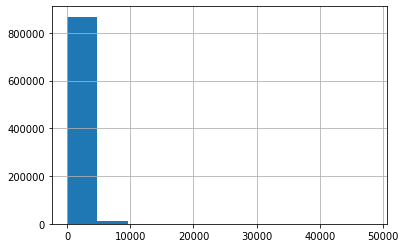

In [67]:
sales_data2.SqFtTotLiving.hist()

In [68]:
sales_data2.describe()

,ExciseTaxNbr,Major,Minor,SalePrice,SqFtTotLiving,YrBuilt
count,8.809960e+05,880996.000000,880996.000000,8.809960e+05,880996.00000,880996.000000
mean,1.985132e+06,452323.136286,1491.636174,4.366627e+05,2108.40444,1969.304482
std,5.772066e+05,286345.042512,2771.047883,8.848404e+05,951.66873,28.357251
min,6.630020e+05,40.000000,1.000000,-6.000000e+02,0.00000,1894.000000
25%,1.526735e+06,206110.000000,115.000000,1.655000e+05,1450.00000,1951.000000
50%,1.964036e+06,388580.000000,320.000000,2.800000e+05,1950.00000,1974.000000
75%,2.475966e+06,723750.000000,960.000000,4.600000e+05,2570.00000,1993.000000
max,3.014839e+06,990600.000000,9689.000000,3.750000e+07,48160.00000,2019.000000


In [70]:
sales_data2[sales_data2.SqFtTotLiving < 1]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
407304,2517675,941240.0,165.0,10/28/2011,1000000.0,0,1900,98118
407306,2681097,941240.0,165.0,07/16/2014,1300000.0,0,1900,98118
407308,1777643,941240.0,165.0,09/19/2000,54440.0,0,1900,98118
407310,2517976,941240.0,165.0,11/09/2011,1515000.0,0,1900,98118
407312,912564,941240.0,165.0,12/01/1986,275000.0,0,1900,98118
664081,1195432,917960.0,425.0,06/12/1991,59000.0,0,2000,98030
1148280,1965494,501500.0,140.0,06/11/2003,310000.0,0,1909,98112


In [97]:
sales_data2.SqFtTotLiving = sales_data2.SqFtTotLiving.replace(0,np.nan)

In [99]:
sales_data2 = sales_data2.dropna()

In [75]:
sales_data2[sales_data2.SalePrice < 1000]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,YrBuilt,ZipCode
120,2878725,785996.0,120.0,06/08/2017,10.0,3250.0,2004,98072
375,2911124,154580.0,1220.0,01/10/2018,10.0,1320.0,1985,98038
750,2015505,82007.0,9027.0,12/22/2003,500.0,3160.0,1966,98022
1995,2107738,438920.0,728.0,02/19/2005,400.0,1880.0,1946,98004
1998,2107739,438920.0,728.0,03/01/2005,400.0,1880.0,1946,98004
2661,2623794,102206.0,9061.0,07/30/2013,900.0,2420.0,1974,98038
2796,1716349,563450.0,966.0,10/15/1999,1.0,1880.0,2002,98028
3422,2943689,62605.0,9265.0,09/02/1993,8.0,3060.0,1967,98011
3642,2910290,10457.0,10.0,01/09/2018,10.0,2060.0,1991,98023
4737,2898879,611440.0,28.0,10/24/2017,500.0,4060.0,1968,98166


In [100]:
sales_data2.describe()

,ExciseTaxNbr,Major,Minor,SalePrice,SqFtTotLiving,YrBuilt
count,8.809890e+05,880989.000000,880989.000000,8.809890e+05,880989.000000,880989.000000
mean,1.985132e+06,452319.777108,1491.646448,4.366611e+05,2108.421193,1969.304908
std,5.772060e+05,286343.376630,2771.056482,8.848422e+05,951.653953,28.356791
min,6.630020e+05,40.000000,1.000000,-6.000000e+02,1.000000,1894.000000
25%,1.526735e+06,206110.000000,115.000000,1.655000e+05,1450.000000,1951.000000
50%,1.964036e+06,388580.000000,320.000000,2.800000e+05,1950.000000,1974.000000
75%,2.475960e+06,723750.000000,960.000000,4.600000e+05,2570.000000,1993.000000
max,3.014839e+06,990600.000000,9689.000000,3.750000e+07,48160.000000,2019.000000


In [101]:
sales_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880989 entries, 0 to 1464607
Data columns (total 8 columns):
ExciseTaxNbr     880989 non-null int64
Major            880989 non-null float64
Minor            880989 non-null float64
DocumentDate     880989 non-null object
SalePrice        880989 non-null float64
SqFtTotLiving    880989 non-null float64
YrBuilt          880989 non-null int64
ZipCode          880989 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 60.5+ MB


In [102]:
sales_data = sales_data2.copy()

### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [103]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

15626    98033-4917
15627    98033-4917
15628    98033-4917
15629    98033-4917
15630    98033-4917
Name: ZipCode, dtype: object

In [91]:
sales_data.ZipCode 

0          NaN
1          NaN
2          NaN
6          NaN
7          NaN
11         NaN
12         NaN
13         NaN
14         NaN
16         NaN
17         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
26         NaN
27         NaN
28         NaN
30         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
38         NaN
40         NaN
41         NaN
42         NaN
          ... 
1464567    NaN
1464568    NaN
1464569    NaN
1464570    NaN
1464571    NaN
1464572    NaN
1464573    NaN
1464578    NaN
1464579    NaN
1464580    NaN
1464581    NaN
1464582    NaN
1464584    NaN
1464586    NaN
1464587    NaN
1464588    NaN
1464589    NaN
1464591    NaN
1464592    NaN
1464593    NaN
1464594    NaN
1464595    NaN
1464600    NaN
1464601    NaN
1464602    NaN
1464603    NaN
1464604    NaN
1464605    NaN
1464606    NaN
1464607    NaN
Name: ZipCode, Length: 880991, dtype: object

### 3. Add a column for PricePerSqFt



In [78]:
sales_data['PricePerSqFt'] = sales_data.SalePrice / sales_data.SqFtTotLiving

### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

In [79]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880996 entries, 0 to 1464607
Data columns (total 9 columns):
ExciseTaxNbr     880996 non-null int64
Major            880996 non-null float64
Minor            880996 non-null float64
DocumentDate     880996 non-null object
SalePrice        880996 non-null float64
SqFtTotLiving    880989 non-null float64
YrBuilt          880996 non-null int64
ZipCode          880996 non-null object
PricePerSqFt     880989 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 67.2+ MB


### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!